# Skills Ladder Demographic Insights

[Skills Ladder](http://skillsladder.co.uk/) is an IT training company based in Gloucestershire, the United Kingdom. This notebook uncovers demographic inisghts about the company's trainees. It shows that the company's younger trainees are more likely to work part-time, have higher qualifications, be from diverse backgrounds, and be more open (based on the fact that a greater number of people in their 40s + opted for 'prefer not to say' when it came to the single parent hoursehold question).

## Read-in data

In [1]:
# imports libraries
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt

# reads-in the processed data
df = pd.read_csv('C:/Users/HUAWEI/Desktop/Projects/Skills-Ladder-Data-Analyis/processed_learner_data.csv')

## Numeric data functions

Numeric data functions are defined so numeric columns can be visualized as a barplot and grouped into bins of variable length if necesarry.

In [2]:
# creates a binned column for simplifying messy numeric data
def create_binned_col(df, col, new_name, bins=10):
    df[new_name] = np.floor((df[col]/bins))*bins
    return df[new_name]

# returns a barplot for numeric columns
def get_numeric_barplot(df, col, title):
    totals_df = get_total_col_count(df, col)
    plt.figure(figsize=(12,5))
    plt.bar(totals_df.index.values.astype('str'), totals_df);
    plt.title(title);
    plt.tight_layout();

## Totals data functions

Totals functions are defined to visualize the totals for categorical and grouped numeric columns.

In [3]:
# returns the total column count
def get_total_col_count(df, col):
    grouped_df = df.groupby(col).count().date
    return grouped_df

# returns simplified dates for plotting
def get_simple_dates(col):
    month = col.apply(lambda x: str(x)[4:6])
    year = col.apply(lambda x: str(x)[2:4])
    return month + '/' + year

# specifies a set of colors to be used for plotting
colors = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray','tab:olive', 
          'tab:cyan','plum','sienna','magenta','tan','gold','yellowgreen','lavender','olive','beige','indigo']

# creates a simple barplot
def get_bar_plot(data, title, color=colors):
    plt.figure(figsize=(12,5))
    plt.bar(data.index, data, color=color);
    plt.title(title);
    plt.tight_layout();

## Monthly data functions

Monthly functions are defined to visualize numeric and categorical columns by month. Several functions are defined to make the plot easier to read (add_simple_dates) and prevent sparse month data for different categories from causing problems (pad_dates). 

In [4]:
# returns the column count by month
def get_monthly_col_count(df, col):
    grouped_df = df.groupby([col, 'numerical_date']).count().date
    return grouped_df

def get_monthly_df(df, col):
    monthly_df = get_monthly_col_count(df, col).reset_index()
    monthly_df.rename({'date': 'value'}, axis=1, inplace=True)
    return monthly_df

def get_multiple_monthly_dfs(df, col):
    monthly_df = get_monthly_df(df, col)
    unique = df[col].unique()
    if type(unique) == np.ndarray:
        unique = np.sort(unique)
    dfs = []
    for i in range(len(unique)):
        dfs.append(monthly_df.loc[monthly_df[col]==unique[i]])
    return dfs

def add_simple_dates(dfs):
    for i in range(len(dfs)):
        dfs[i] = dfs[i].assign(new_date = get_simple_dates(dfs[i]['numerical_date']))
    return dfs

def pad_dates(final_dfs):
    all_dfs = pd.concat(final_dfs)
    all_dfs.sort_values('numerical_date', inplace=True)
    unique_dates = all_dfs.new_date.unique()
    
    # inserts a new row with a 0 value where the first dataframe is missing neccesary data
    counter = -1
    for i in range(len(unique_dates)):
        if unique_dates[i] not in final_dfs[0].new_date.values and i < len(final_dfs[0]):
            final_dfs[0].loc[eval(str(i+counter) + '.' + '5')] = final_dfs[0].iloc[i,0], final_dfs[0].iloc[i,1], 0, unique_dates[i]
            counter -= 1
            
    # returns the sorted first dataframe
    return final_dfs[0].sort_index(axis=0)

def create_line_plot(dfs, col, title):
    # creates a subplot object and specifies unique col values and colors
    fig, ax = plt.subplots(1, 1, figsize=(14.75,8))
    plt.subplots_adjust(top = 0.75, bottom=0.25, hspace=0.35, wspace=0.25)
    
    # specifies unique columns
    unique_cols = pd.concat(dfs)[col].unique()
    
    # loops a lineplot for each unique column value
    for i in range(len(unique_cols)):
        ax.plot(dfs[i].new_date, dfs[i].value, color=colors[i]);
    ax.title.set_text(title);
    ax.tick_params(axis='x', labelrotation=45);
    ax.legend(unique_cols);

# pulls all the previous functions together
def get_line_plot(df, col, title):
    dfs = get_multiple_monthly_dfs(df, col)
    final_dfs = add_simple_dates(dfs)
    final_dfs[0] = pad_dates(final_dfs)
    create_line_plot(final_dfs, col, title)    

# Numeric columns

## Age

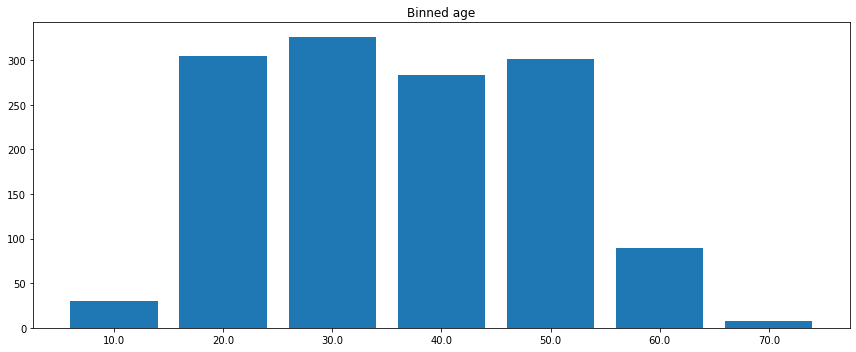

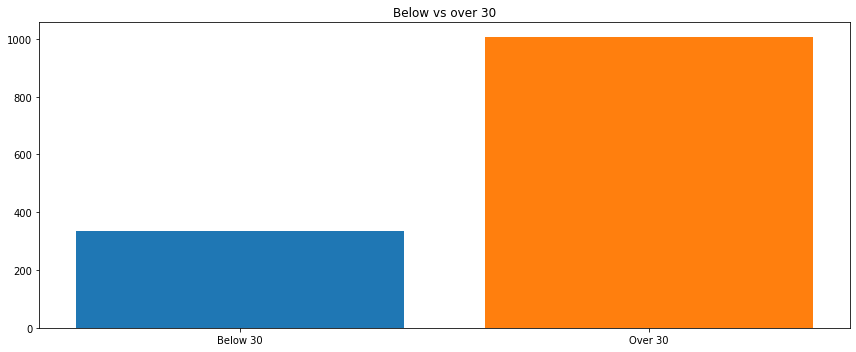

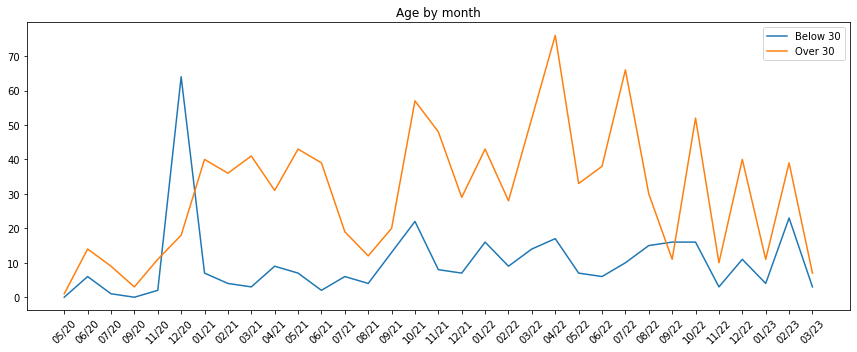

In [5]:
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore", category=FutureWarning) 

# creates a binned column for a numerical barplot
create_binned_col(df, 'age_then', 'binned_age')

# creates a barplot of a numeric column
get_numeric_barplot(df, 'binned_age', 'Binned age')

# creates a new column with a binary split
df['over/under_30'] = np.where(df['age_then'] < 30, 'Below 30', 'Over 30')

# plots total as a barplot
get_bar_plot(get_total_col_count(df, 'over/under_30'), 'Below vs over 30')

# returns a lineplot by month
get_line_plot(df, 'over/under_30', 'Age by month')

## Hours worked

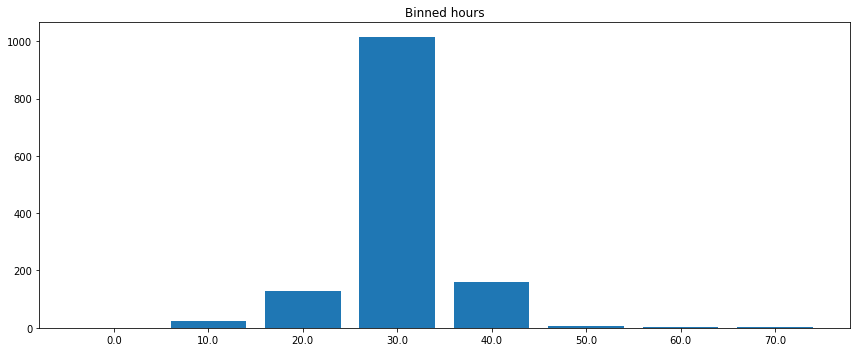

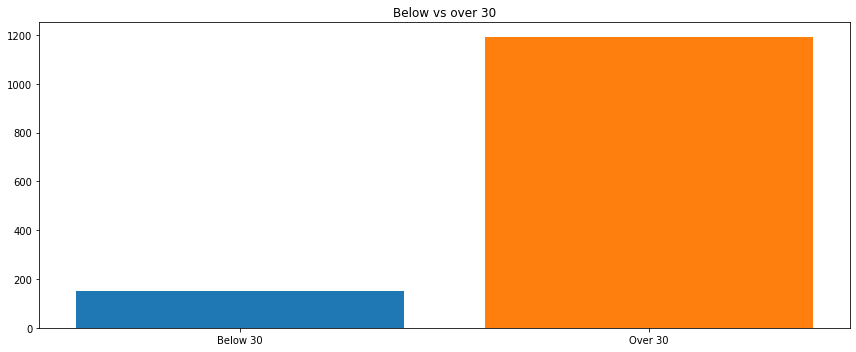

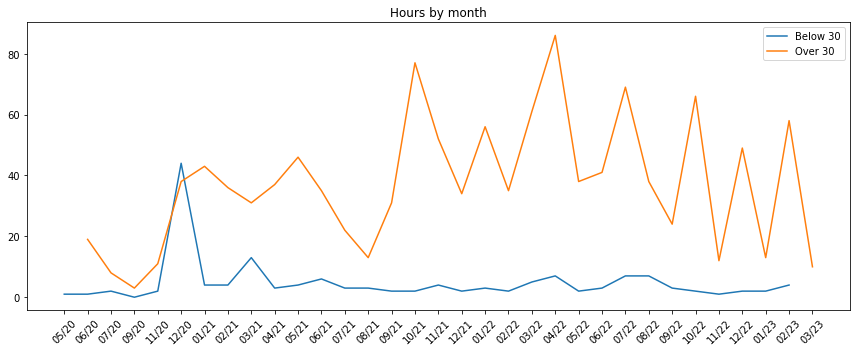

In [6]:
# creates a binned column for a numerical barplot
create_binned_col(df, 'hoursworked', 'binned_hours')

# creates a barplot of a numeric column
get_numeric_barplot(df, 'binned_hours', 'Binned hours')

# creates a new column with a binary split
df['over/under_30_hours'] = np.where(df['hoursworked'] < 30, 'Below 30', 'Over 30')

# plots total as a barplot
get_bar_plot(get_total_col_count(df, 'over/under_30_hours'), 'Below vs over 30')

# returns a lineplot by month
get_line_plot(df, 'over/under_30_hours', 'Hours by month')

## Qualifications

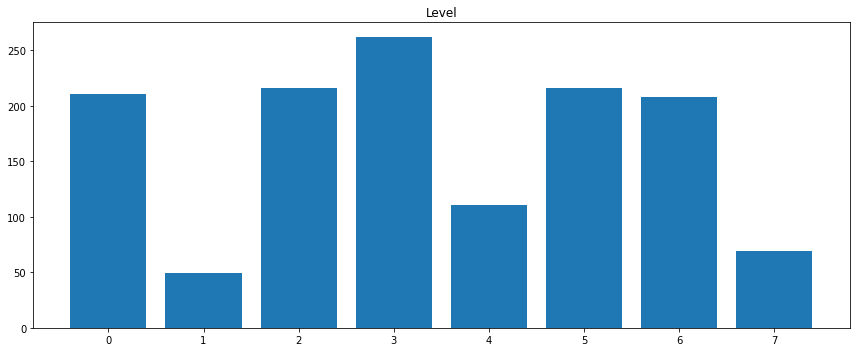

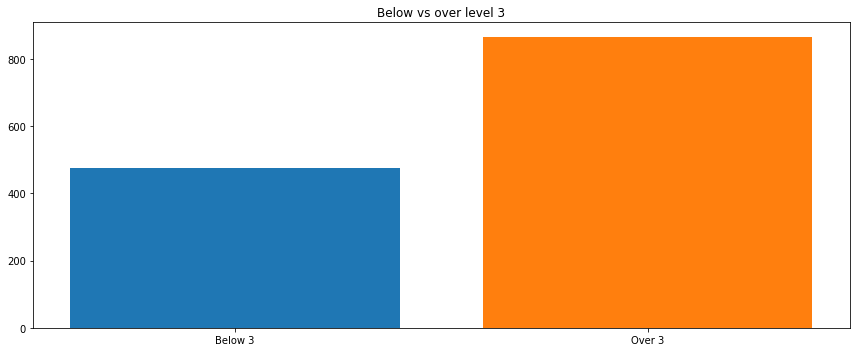

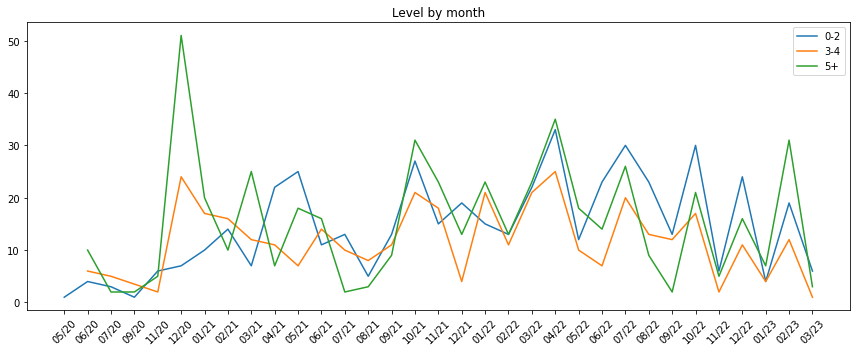

In [7]:
# extracts the level number from the qualifficaiton text column
split = df['qualification'].apply(lambda x: x.lower().split('level'))
new_col = []
for i in range(len(split)):
    if len(split[i])>1:
        txt = split[i][1].strip()
        if len(txt) == 0:
            new_col.append('0')
        elif txt[0] == 'n':
            new_col.append('0')
        else:
            new_col.append(txt[0])
    else:
        new_col.append('0')
        
df['level'] = [eval(i) for i in new_col]

# creates a barplot of a numeric column
get_numeric_barplot(df, 'level', 'Level')

# creates a new column with a binary split
df['level_split'] = np.where(df['level'] < 3, 'Below 3', 'Over 3')

# plots total as a barplot
get_bar_plot(get_total_col_count(df, 'level_split'), 'Below vs over level 3')

# creates a new grouped column for levels for ease of analysis
level_groups = []
for i in range(len(df)):
    if df.level[i] <= 2:
        level_groups.append('0-2')
    elif df.level[i] > 2 and df.level[i] < 5:
        level_groups.append('3-4')
    else:
        level_groups.append('5+')
        
df['level_groups'] = level_groups

# returns a lineplot by month
get_line_plot(df, 'level_groups', 'Level by month')

# Categorical columns

## Gender

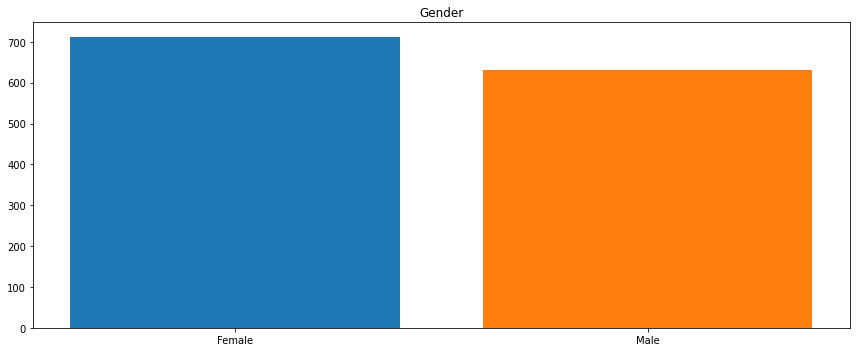

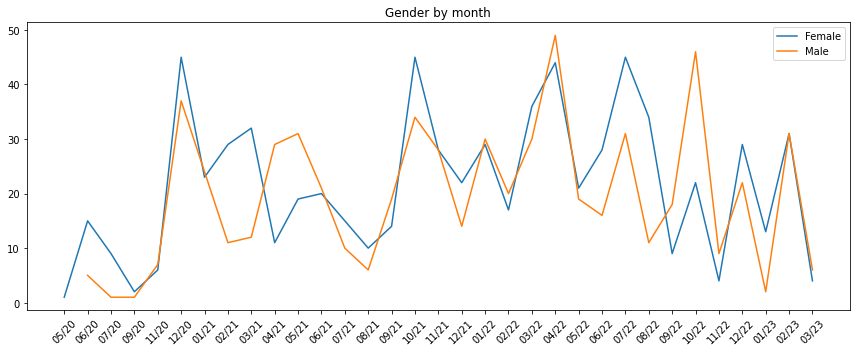

In [8]:
# plots total as a barplot
get_bar_plot(get_total_col_count(df, 'sex'), 'Gender')

# returns a lineplot by month
get_line_plot(df, 'sex', 'Gender by month')

## Ethnicity

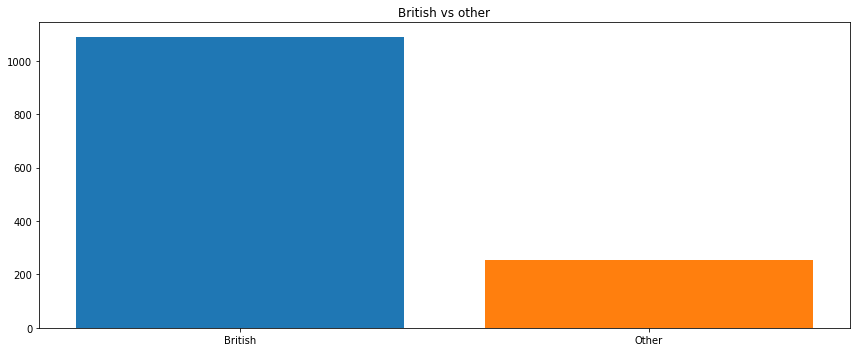

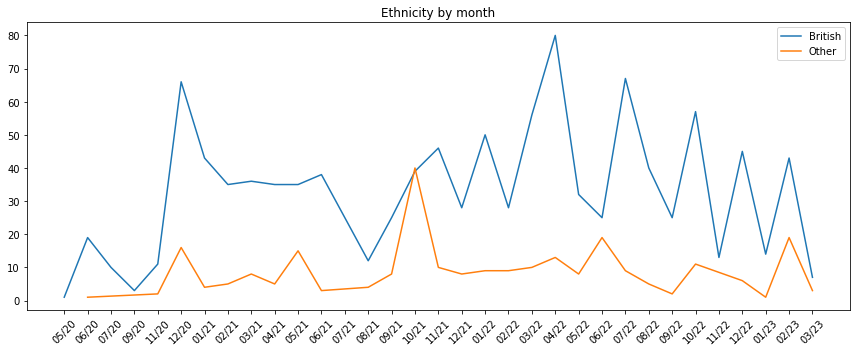

In [9]:
# creates a new column for british or other
df['british'] = np.where(df['ethnicity']=='English/Welsh/Scottish/N Irish/British', 'British', 'Other')

# plots total as a barplot
get_bar_plot(get_total_col_count(df, 'british'), 'British vs other')

# returns a lineplot by month
get_line_plot(df, 'british', 'Ethnicity by month')

## Job role

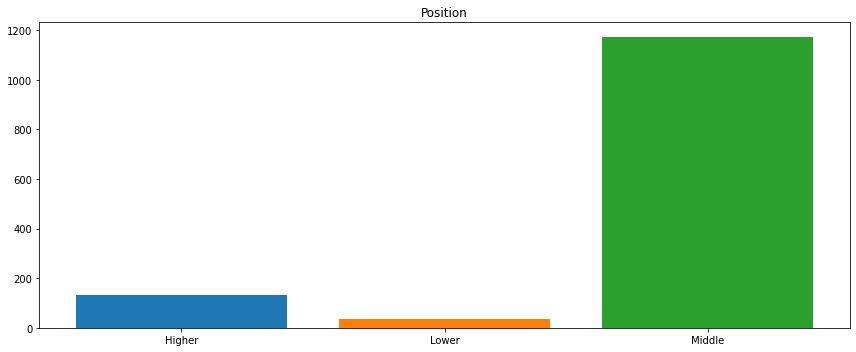

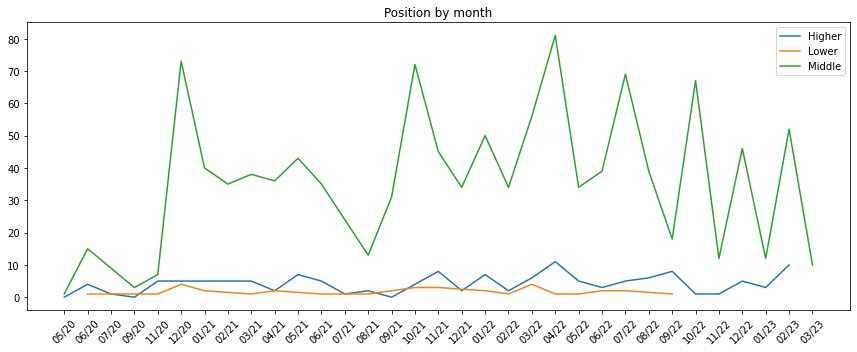

In [10]:
# makes all roles non caps
non_caps_role = df['job-role'].apply(lambda x: x.lower())

# defines some words that might indicate a higher/lower position
higher_pos = ['director', 'senior', 'executive', 'chairman', 'owner', 'head']
lower_pos = ['graduate', 'intern', 'assistant', 'junior', 'trainee', 'apprentice']

# loops though each word of each position type list to check for indications of higher or lower positions
position = []
for i in range(len(df)):
    split_word = non_caps_role[i].split(' ')
    status = 'not found'
    
    for j in range(len(higher_pos)):
        
        for word in range(len(split_word)):
            if higher_pos[j] == split_word[word].lower():
                position.append('Higher')
                status = 'found'
                break
            break

    if status == 'not found':
        for z in range(len(lower_pos)):
            for word in range(len(split_word)):
                if lower_pos[z] == split_word[word].lower():
                    position.append('Lower')
                    status = 'found'
                    break
                break
        
    if status == 'not found':
        position.append('Middle')
                    
df['position'] = position

# plots total as a barplot
get_bar_plot(get_total_col_count(df, 'position'), 'Position')

# returns a lineplot by month
get_line_plot(df, 'position', 'Position by month')

## Single household

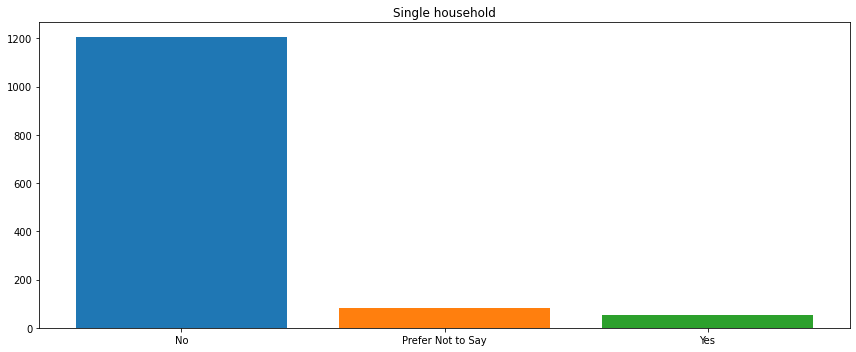

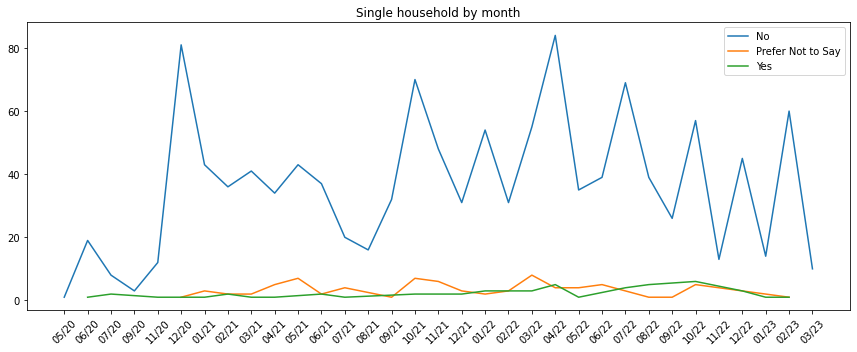

In [11]:
# plots total as a barplot
get_bar_plot(get_total_col_count(df, 'hhs'), 'Single household')

# returns a lineplot by month
get_line_plot(df, 'hhs', 'Single household by month')

# Segemented analysis

## By age function

In [301]:
# returns a formatted list of rounded binned age values + 's' to signal 20s, 30s, etc.
binned_age_f = []
for i in range(len(df)):
    binned_age_f.append(str(round(df.loc[:, 'binned_age'][i])) + 's')
df['binned_age_f'] = binned_age_f

# gets total for and plots each column
def get_binned_age_plot(df, col, col_title=''):
    # creates an array of unique column values
    unique = df[col].unique()
    
    # creates a column number object. varies column length 
    # to prevent it from breaking in binary splits
    if len(unique) >= 3:
        col_num = 3
    else:
        col_num = 2
    
    # creates a row number object for the subplot argument below
    row_num = int(np.ceil(len(unique)/col_num))
    
    # sorts any numeric values in the unqiue array so they appear in order
    if type(unique[0]) != str:
        unique = np.sort(unique)
    
    # alows a column title default to be overiden from the column name 
    # if its not clear and needs to be changed
    if col_title == '':
        title = col.title()
    else:
        title = col_title
    
    # creates a dataframe and plots each unique column value against binned age.
    fig, ax = plt.subplots(row_num, col_num, figsize=(col_num*4,row_num*4), constrained_layout=True)
    for i in range(row_num):
        for j in range(col_num):
            # breaks if at the final unique column value
            num = (i*3)+j
            if num >= len(unique):
                ax[i,j].set_axis_off()
                break
            else:
                temp_df = get_total_col_count(df.loc[df[col]==unique[num]], 'binned_age_f')
                # uses only 1 axis argument where row number is only 1
                if row_num > 1:
                    ax[i,j].bar(temp_df.index, temp_df)
                    ax[i,j].title.set_text(title + ': ' + str(unique[num]))
                else:
                    ax[j].bar(temp_df.index, temp_df)
                    ax[j].title.set_text(title + ': ' + str(unique[num]))

## Hours by age

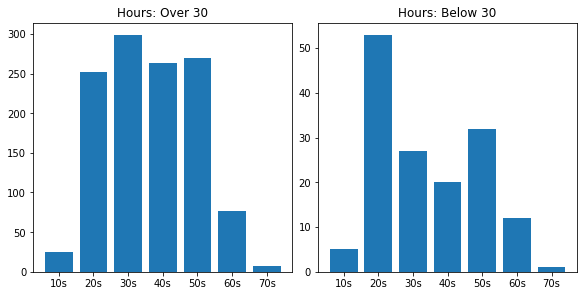

In [303]:
# gets binned age by hours
get_binned_age_plot(df, 'over/under_30_hours', 'Hours')

## Qualifications by age

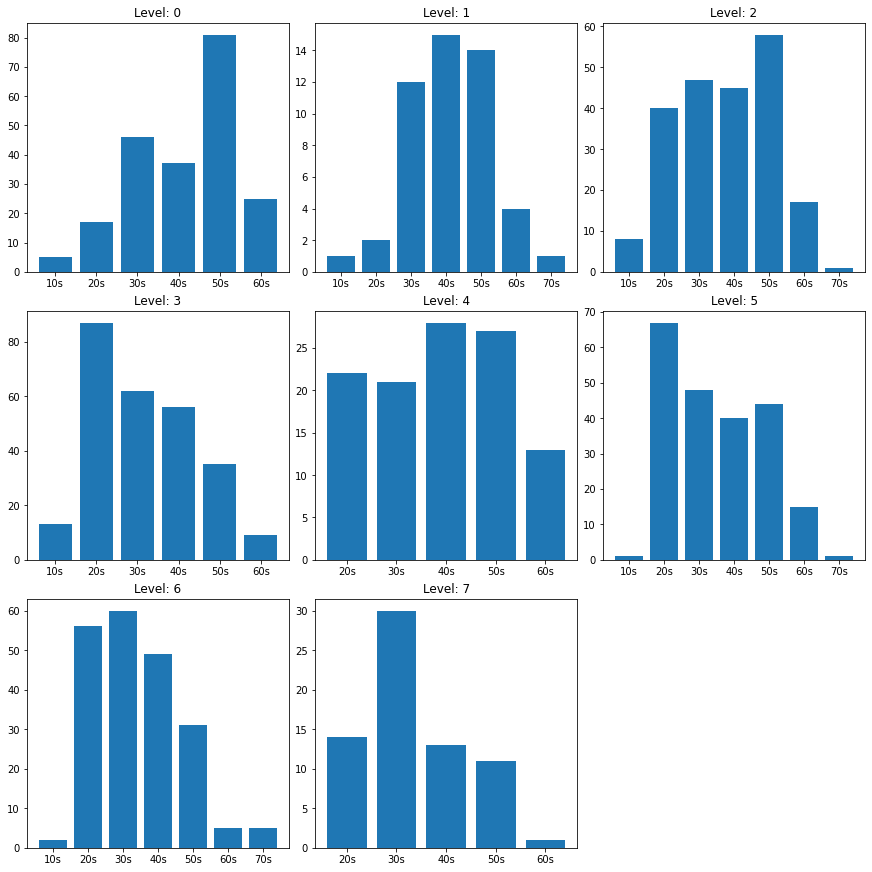

In [304]:
# gets binned age by qualification
get_binned_age_plot(df, 'level')

## Gender by age

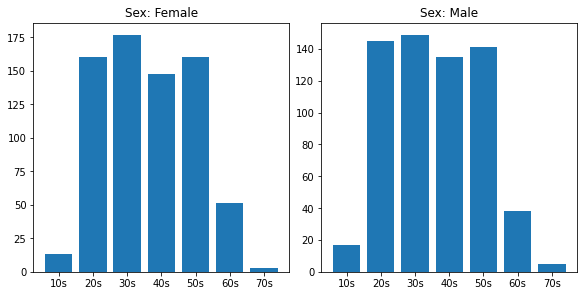

In [305]:
# gets binned age by gender
get_binned_age_plot(df, 'sex')

## Ethnicity by age

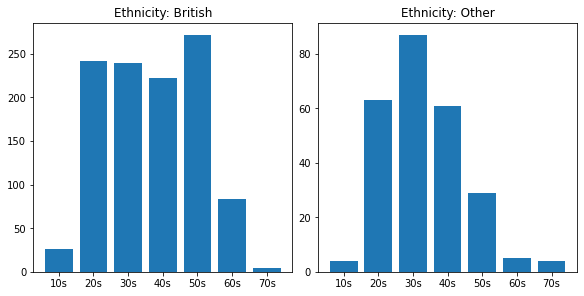

In [306]:
# gets binned age by ethnicity
get_binned_age_plot(df, 'british', 'Ethnicity')

## Job role by age

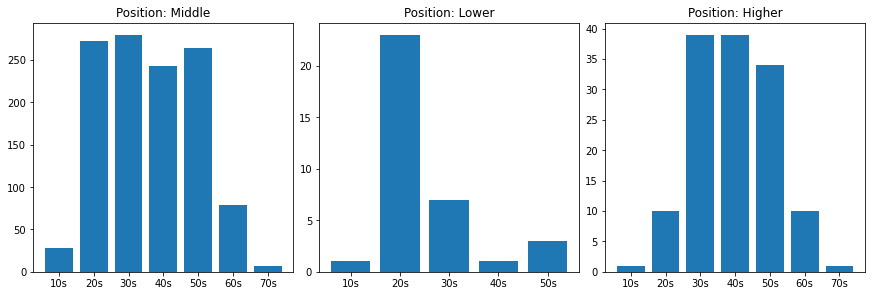

In [307]:
# gets binned age by job role
get_binned_age_plot(df, 'position')

## Single household by age

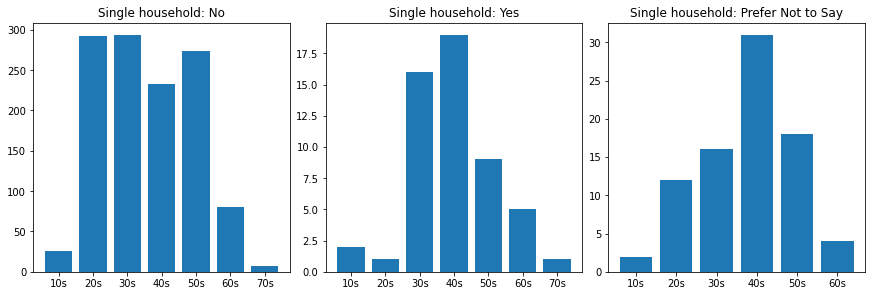

In [308]:
# gets binned age by single household
get_binned_age_plot(df, 'hhs', 'Single household')